In [165]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score,log_loss

In [166]:
df = pd.read_csv("data.csv")

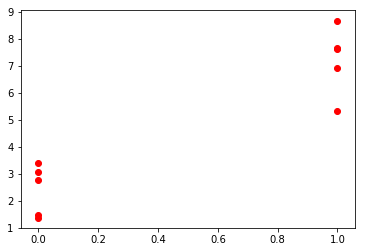

In [167]:
plt.scatter(df['y'], df['x1'], color='r')


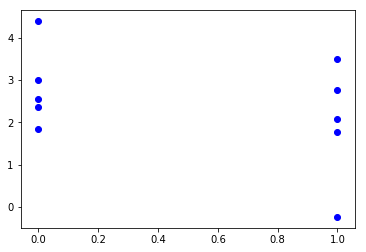

In [168]:
plt.scatter(df['y'], df['x2'], color='b')

In [169]:
x1 = df['x1']
x2 = df['x2']
y = df['y']

In [170]:
def func(x):
    return 1/(1+np.exp(-x))
b0 = 0.0
b1 = 0.0
b2 = 0.0
alpha = 0.01

error_ = []
b1_ = []
b2_ = []

for l in range(100):
    for i,j,k in zip(x1,x2,y):
        z = b0 + b1*i + b2*j
        pred = func(z)
        
        error = pred - k
        error_.append(error)
        b0 -= alpha*error
        b1 -= alpha*error*i
        b1_.append(b1)
        b2 -= alpha*error*j
        b2_.append(b2)
        
        print(f'epoc:{l}, b0:{b0}, b1:{b1}, b2:{b2}, error:{error}')

print(f'b0:{b0}, b1:{b1}, b2:{b2}')

epoc:0, b0:-0.005, b1:-0.01390542, b2:-0.012752685, error:0.5
epoc:0, b0:-0.009861281417383808, b1:-0.02102957444308038, b2:-0.02423563936803773, error:0.4861281417383808
epoc:0, b0:-0.014392825704986196, b1:-0.03642124557166772, b2:-0.04417576650750879, error:0.45315442876023876
epoc:0, b0:-0.01902677441940613, b1:-0.042853490763692596, b2:-0.052749591097902844, error:0.4633948714419935
epoc:0, b0:-0.02326070071186412, b1:-0.05582654576647692, b2:-0.06547383518818459, error:0.42339262924579857
epoc:0, b0:-0.016736398207432713, b1:-0.006062226160548738, b2:-0.047471575211202176, error:-0.6524302504431406
epoc:0, b0:-0.011366541829851425, b1:0.022572216151377205, b2:-0.036255948194863705, error:-0.5369856377581288
epoc:0, b0:-0.006568133013692434, b1:0.055789666626892984, b2:-0.0277576590832819, error:-0.4798408816158991
epoc:0, b0:-0.002755406339642426, b1:0.08886666805675322, b2:-0.028680605829269186, error:-0.38127266740500076
epoc:0, b0:0.0008372382939286546, b1:0.1164357463694871, 

In [171]:
pred = [np.round(func(b0 + b1*x1 + b2*x2)) for x1,x2 in zip(x1,x2)]

In [172]:
print(confusion_matrix(y,pred))
print(f'Accuracy:{accuracy_score(y,pred)}')

[[5 0]
 [0 5]]
Accuracy:1.0


In [173]:
print(error_)

[0.5, 0.4861281417383808, 0.45315442876023876, 0.4633948714419935, 0.42339262924579857, -0.6524302504431406, -0.5369856377581288, -0.4798408816158991, -0.38127266740500076, -0.35926446335710804, 0.5704416881415878, 0.5175375680040628, 0.5292767896253088, 0.49160343655743743, 0.4906435569422059, -0.4670523826367373, -0.42754125368975526, -0.3462745939862427, -0.23537823617540254, -0.27551604812759845, 0.5865942778636511, 0.515435091273664, 0.5373054165898012, 0.49286328443588506, 0.5061503803202277, -0.38417957104253964, -0.38191333158585394, -0.2883579638618263, -0.1703612388357677, -0.24550147342025797, 0.5831781442546597, 0.5012979211533726, 0.5205880276746048, 0.4843347617674927, 0.5023142756695012, -0.3430898507444067, -0.35982224482503267, -0.25712660957681255, -0.13337671910153504, -0.23359053304466038, 0.5724201076253655, 0.48302903643697687, 0.49493910895828536, 0.47236694765970966, 0.4912688698967647, -0.3185693642889077, -0.34712346639361646, -0.23659253904507305, -0.10851810

In [174]:
print(b1_)

[-0.01390542, -0.02102957444308038, -0.03642124557166772, -0.042853490763692596, -0.05582654576647692, -0.006062226160548738, 0.022572216151377205, 0.055789666626892984, 0.08886666805675322, 0.1164357463694871, 0.1005712838512515, 0.09298682772128444, 0.07500961341005126, 0.06818581358822844, 0.053152141740158254, 0.08877670701201401, 0.11157509211568054, 0.13554628677073435, 0.15596633499376011, 0.17710876426791458, 0.16079508466133305, 0.15324144009657753, 0.13499152849274665, 0.12815024110047746, 0.11264142901919184, 0.14194484489612857, 0.1623101479740786, 0.18227200772963847, 0.19705155901223204, 0.21589074305890749, 0.19967206899754422, 0.19232560310581287, 0.17464350798126776, 0.16792060245360174, 0.15252933138080974, 0.17869861610419308, 0.1978859250143635, 0.21568576397512965, 0.22725675320564084, 0.24518192075058745, 0.22926243672463564, 0.22218369932884574, 0.20537278563083003, 0.1988160017404499, 0.1837631698532267, 0.20806214687086605, 0.22657230091346048, 0.24295064892361

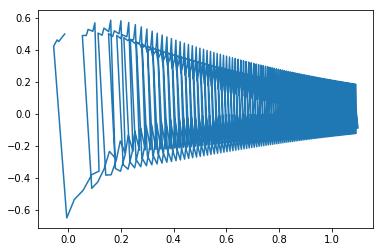

In [175]:
plt.plot(b1_,error_)

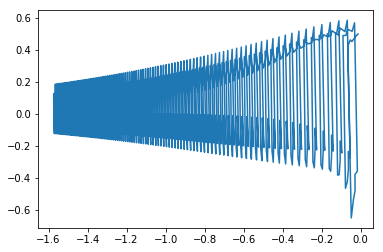

In [176]:
plt.plot(b2_,error_)

In [177]:
from sklearn.linear_model import LogisticRegression

In [178]:
logi = LogisticRegression()
logi.fit(df[['x1','x2']],y)

LogisticRegression()

In [179]:
print(logi.coef_, logi.intercept_, logi.score(df[['x1','x2']],y))

[[ 1.18383416 -0.35803503]] [-4.55163352] 1.0


# Q2

In [206]:
x1_2 = df['x1']
#x2 = df['x2']
y_2 = df['y']
y_2 = np.array(y_2)

In [207]:
def s(x):
    return 1/(1+np.exp(-x))
b0 = 0.0
b1 = 0.0
alpha = 0.01

error_2 = []
b1_2 = []


for l in range(150):
    for i,j in zip(x1_2,y_2):
        z = b0 + b1*i 
        pred = func(z)
        
        error2 = pred - j
        error_2.append(error2)
        b0 -= alpha*error2
        b1 -= alpha*error2*i
        b1_2.append(b1)
        
        print(f'epoc:{l}, b0:{b0}, b1:{b1}, error:{error}')

print(f'b0:{b0}, b1:{b1}')

epoc:0, b0:-0.005, b1:-0.01390542, error:-0.08821330180966369
epoc:0, b0:-0.009936557804859775, b1:-0.021139891160886146, error:-0.08821330180966369
epoc:0, b0:-0.014732322733970566, b1:-0.03742900408003655, error:-0.08821330180966369
epoc:0, b0:-0.019565668488666376, b1:-0.044138026321757166, error:-0.08821330180966369
epoc:0, b0:-0.024179420167362093, b1:-0.058274893655401706, error:-0.08821330180966369
epoc:0, b0:-0.01802872396698062, b1:-0.011360267715409822, error:-0.08821330180966369
epoc:0, b0:-0.012832308391130538, b1:0.016349311754291766, error:-0.08821330180966369
epoc:0, b0:-0.00808296656110977, b1:0.04922709125876805, error:-0.08821330180966369
epoc:0, b0:-0.004115364437301383, b1:0.08364770210809569, error:-0.08821330180966369
epoc:0, b0:-0.0006578714963920321, b1:0.11017965930835646, error:-0.08821330180966369
epoc:1, b0:-0.006416373871130872, b1:0.09416478049000827, error:-0.08821330180966369
epoc:1, b0:-0.011744852769346462, b1:0.08635595327794121, error:-0.088213301809

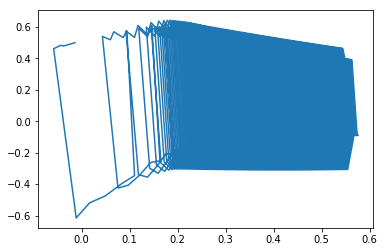

In [208]:
plt.plot(b1_2,error_2)

In [209]:
pred2 = [np.round(func(b0 + b1*x1)) for x1 in x1_2]
pred = np.array(pred2)

In [213]:
print(confusion_matrix(y_2,pred2))
print(f'Accuracy:{accuracy_score(y_2,pred2)}')
print(pred2)
print(y_2)

[[5 0]
 [0 5]]
Accuracy:1.0
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0 0 0 0 0 1 1 1 1 1]


In [211]:
for i in range(10):
    
    l = 1/10(np.multiply(y_2,np.log(pred2[i])) + np.multiply(1-y_2[i],np.log(1-pred2[i])))
    print(l)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: 'int' object is not callable